# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

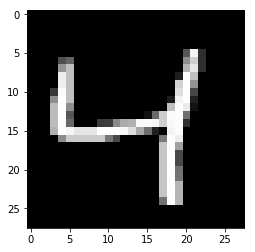

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [4]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32

image_size = mnist.train.images.shape[1]

inputs_ = tf.placeholder(tf.float32, (None, image_size), name='inputs')
targets_ = tf.placeholder(tf.float32, (None, image_size), name='targets')

# Output of hidden layer
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits
logits = tf.layers.dense(encoded, image_size, activation=None)
# Sigmoid output from
decoded = tf.nn.sigmoid(logits, name='output')

loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
cost = tf.reduce_mean(loss)
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

## Training

In [5]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss and the test loss afterwards. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [6]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6963
Epoch: 1/20... Training loss: 0.6925
Epoch: 1/20... Training loss: 0.6898
Epoch: 1/20... Training loss: 0.6868
Epoch: 1/20... Training loss: 0.6837
Epoch: 1/20... Training loss: 0.6798
Epoch: 1/20... Training loss: 0.6749
Epoch: 1/20... Training loss: 0.6695
Epoch: 1/20... Training loss: 0.6620
Epoch: 1/20... Training loss: 0.6551
Epoch: 1/20... Training loss: 0.6448
Epoch: 1/20... Training loss: 0.6344
Epoch: 1/20... Training loss: 0.6215
Epoch: 1/20... Training loss: 0.6095
Epoch: 1/20... Training loss: 0.5933
Epoch: 1/20... Training loss: 0.5768
Epoch: 1/20... Training loss: 0.5640
Epoch: 1/20... Training loss: 0.5465
Epoch: 1/20... Training loss: 0.5266
Epoch: 1/20... Training loss: 0.5089
Epoch: 1/20... Training loss: 0.4923
Epoch: 1/20... Training loss: 0.4772
Epoch: 1/20... Training loss: 0.4584
Epoch: 1/20... Training loss: 0.4387
Epoch: 1/20... Training loss: 0.4281
Epoch: 1/20... Training loss: 0.4138
Epoch: 1/20... Training loss: 0.3925
E

Epoch: 1/20... Training loss: 0.1952
Epoch: 1/20... Training loss: 0.1907
Epoch: 1/20... Training loss: 0.1921
Epoch: 1/20... Training loss: 0.1807
Epoch: 1/20... Training loss: 0.1886
Epoch: 1/20... Training loss: 0.1899
Epoch: 1/20... Training loss: 0.1897
Epoch: 1/20... Training loss: 0.1899
Epoch: 1/20... Training loss: 0.1899
Epoch: 1/20... Training loss: 0.1910
Epoch: 1/20... Training loss: 0.1888
Epoch: 1/20... Training loss: 0.1908
Epoch: 1/20... Training loss: 0.1914
Epoch: 1/20... Training loss: 0.1822
Epoch: 1/20... Training loss: 0.1921
Epoch: 1/20... Training loss: 0.1868
Epoch: 1/20... Training loss: 0.1911
Epoch: 1/20... Training loss: 0.1860
Epoch: 1/20... Training loss: 0.1917
Epoch: 1/20... Training loss: 0.1871
Epoch: 1/20... Training loss: 0.1901
Epoch: 1/20... Training loss: 0.1825
Epoch: 1/20... Training loss: 0.1903
Epoch: 1/20... Training loss: 0.1757
Epoch: 1/20... Training loss: 0.1872
Epoch: 1/20... Training loss: 0.1855
Epoch: 1/20... Training loss: 0.1871
E

Epoch: 2/20... Training loss: 0.1524
Epoch: 2/20... Training loss: 0.1575
Epoch: 2/20... Training loss: 0.1499
Epoch: 2/20... Training loss: 0.1556
Epoch: 2/20... Training loss: 0.1547
Epoch: 2/20... Training loss: 0.1566
Epoch: 2/20... Training loss: 0.1494
Epoch: 2/20... Training loss: 0.1607
Epoch: 2/20... Training loss: 0.1525
Epoch: 2/20... Training loss: 0.1539
Epoch: 2/20... Training loss: 0.1598
Epoch: 2/20... Training loss: 0.1555
Epoch: 2/20... Training loss: 0.1558
Epoch: 2/20... Training loss: 0.1495
Epoch: 2/20... Training loss: 0.1565
Epoch: 2/20... Training loss: 0.1569
Epoch: 2/20... Training loss: 0.1536
Epoch: 2/20... Training loss: 0.1537
Epoch: 2/20... Training loss: 0.1571
Epoch: 2/20... Training loss: 0.1532
Epoch: 2/20... Training loss: 0.1545
Epoch: 2/20... Training loss: 0.1559
Epoch: 2/20... Training loss: 0.1607
Epoch: 2/20... Training loss: 0.1518
Epoch: 2/20... Training loss: 0.1533
Epoch: 2/20... Training loss: 0.1575
Epoch: 2/20... Training loss: 0.1577
E

Epoch: 3/20... Training loss: 0.1310
Epoch: 3/20... Training loss: 0.1372
Epoch: 3/20... Training loss: 0.1382
Epoch: 3/20... Training loss: 0.1384
Epoch: 3/20... Training loss: 0.1347
Epoch: 3/20... Training loss: 0.1385
Epoch: 3/20... Training loss: 0.1327
Epoch: 3/20... Training loss: 0.1340
Epoch: 3/20... Training loss: 0.1401
Epoch: 3/20... Training loss: 0.1421
Epoch: 3/20... Training loss: 0.1337
Epoch: 3/20... Training loss: 0.1402
Epoch: 3/20... Training loss: 0.1390
Epoch: 3/20... Training loss: 0.1360
Epoch: 3/20... Training loss: 0.1393
Epoch: 3/20... Training loss: 0.1336
Epoch: 3/20... Training loss: 0.1389
Epoch: 3/20... Training loss: 0.1397
Epoch: 3/20... Training loss: 0.1413
Epoch: 3/20... Training loss: 0.1373
Epoch: 3/20... Training loss: 0.1369
Epoch: 3/20... Training loss: 0.1385
Epoch: 3/20... Training loss: 0.1325
Epoch: 3/20... Training loss: 0.1383
Epoch: 3/20... Training loss: 0.1404
Epoch: 3/20... Training loss: 0.1378
Epoch: 3/20... Training loss: 0.1352
E

Epoch: 4/20... Training loss: 0.1211
Epoch: 4/20... Training loss: 0.1275
Epoch: 4/20... Training loss: 0.1222
Epoch: 4/20... Training loss: 0.1277
Epoch: 4/20... Training loss: 0.1241
Epoch: 4/20... Training loss: 0.1229
Epoch: 4/20... Training loss: 0.1167
Epoch: 4/20... Training loss: 0.1244
Epoch: 4/20... Training loss: 0.1192
Epoch: 4/20... Training loss: 0.1240
Epoch: 4/20... Training loss: 0.1225
Epoch: 4/20... Training loss: 0.1218
Epoch: 4/20... Training loss: 0.1244
Epoch: 4/20... Training loss: 0.1247
Epoch: 4/20... Training loss: 0.1230
Epoch: 4/20... Training loss: 0.1273
Epoch: 4/20... Training loss: 0.1238
Epoch: 4/20... Training loss: 0.1247
Epoch: 4/20... Training loss: 0.1249
Epoch: 4/20... Training loss: 0.1229
Epoch: 4/20... Training loss: 0.1224
Epoch: 4/20... Training loss: 0.1221
Epoch: 4/20... Training loss: 0.1242
Epoch: 4/20... Training loss: 0.1223
Epoch: 4/20... Training loss: 0.1257
Epoch: 4/20... Training loss: 0.1261
Epoch: 4/20... Training loss: 0.1290
E

Epoch: 4/20... Training loss: 0.1135
Epoch: 4/20... Training loss: 0.1115
Epoch: 4/20... Training loss: 0.1180
Epoch: 4/20... Training loss: 0.1198
Epoch: 4/20... Training loss: 0.1158
Epoch: 4/20... Training loss: 0.1116
Epoch: 4/20... Training loss: 0.1215
Epoch: 4/20... Training loss: 0.1164
Epoch: 4/20... Training loss: 0.1162
Epoch: 4/20... Training loss: 0.1143
Epoch: 4/20... Training loss: 0.1136
Epoch: 4/20... Training loss: 0.1153
Epoch: 4/20... Training loss: 0.1104
Epoch: 4/20... Training loss: 0.1152
Epoch: 4/20... Training loss: 0.1190
Epoch: 4/20... Training loss: 0.1165
Epoch: 4/20... Training loss: 0.1145
Epoch: 5/20... Training loss: 0.1143
Epoch: 5/20... Training loss: 0.1126
Epoch: 5/20... Training loss: 0.1157
Epoch: 5/20... Training loss: 0.1157
Epoch: 5/20... Training loss: 0.1135
Epoch: 5/20... Training loss: 0.1168
Epoch: 5/20... Training loss: 0.1140
Epoch: 5/20... Training loss: 0.1144
Epoch: 5/20... Training loss: 0.1139
Epoch: 5/20... Training loss: 0.1158
E

Epoch: 5/20... Training loss: 0.1065
Epoch: 5/20... Training loss: 0.1094
Epoch: 5/20... Training loss: 0.1077
Epoch: 5/20... Training loss: 0.1106
Epoch: 5/20... Training loss: 0.1120
Epoch: 5/20... Training loss: 0.1077
Epoch: 5/20... Training loss: 0.1090
Epoch: 5/20... Training loss: 0.1116
Epoch: 5/20... Training loss: 0.1072
Epoch: 5/20... Training loss: 0.1117
Epoch: 5/20... Training loss: 0.1096
Epoch: 5/20... Training loss: 0.1104
Epoch: 5/20... Training loss: 0.1072
Epoch: 5/20... Training loss: 0.1094
Epoch: 5/20... Training loss: 0.1123
Epoch: 5/20... Training loss: 0.1071
Epoch: 5/20... Training loss: 0.1097
Epoch: 5/20... Training loss: 0.1069
Epoch: 5/20... Training loss: 0.1089
Epoch: 5/20... Training loss: 0.1059
Epoch: 5/20... Training loss: 0.1030
Epoch: 5/20... Training loss: 0.1102
Epoch: 5/20... Training loss: 0.1103
Epoch: 5/20... Training loss: 0.1098
Epoch: 5/20... Training loss: 0.1073
Epoch: 5/20... Training loss: 0.1067
Epoch: 5/20... Training loss: 0.1093
E

Epoch: 6/20... Training loss: 0.1077
Epoch: 6/20... Training loss: 0.1099
Epoch: 6/20... Training loss: 0.1069
Epoch: 6/20... Training loss: 0.1042
Epoch: 6/20... Training loss: 0.1092
Epoch: 6/20... Training loss: 0.1091
Epoch: 6/20... Training loss: 0.1052
Epoch: 6/20... Training loss: 0.1071
Epoch: 6/20... Training loss: 0.1077
Epoch: 6/20... Training loss: 0.1036
Epoch: 6/20... Training loss: 0.1042
Epoch: 6/20... Training loss: 0.1018
Epoch: 6/20... Training loss: 0.1054
Epoch: 6/20... Training loss: 0.1039
Epoch: 6/20... Training loss: 0.1072
Epoch: 6/20... Training loss: 0.1042
Epoch: 6/20... Training loss: 0.1023
Epoch: 6/20... Training loss: 0.1043
Epoch: 6/20... Training loss: 0.1034
Epoch: 6/20... Training loss: 0.1053
Epoch: 6/20... Training loss: 0.1025
Epoch: 6/20... Training loss: 0.1074
Epoch: 6/20... Training loss: 0.1087
Epoch: 6/20... Training loss: 0.1013
Epoch: 6/20... Training loss: 0.1095
Epoch: 6/20... Training loss: 0.1038
Epoch: 6/20... Training loss: 0.1052
E

Epoch: 7/20... Training loss: 0.1024
Epoch: 7/20... Training loss: 0.1061
Epoch: 7/20... Training loss: 0.1015
Epoch: 7/20... Training loss: 0.1049
Epoch: 7/20... Training loss: 0.1036
Epoch: 7/20... Training loss: 0.0978
Epoch: 7/20... Training loss: 0.1046
Epoch: 7/20... Training loss: 0.1011
Epoch: 7/20... Training loss: 0.1022
Epoch: 7/20... Training loss: 0.0990
Epoch: 7/20... Training loss: 0.1042
Epoch: 7/20... Training loss: 0.1000
Epoch: 7/20... Training loss: 0.1043
Epoch: 7/20... Training loss: 0.1034
Epoch: 7/20... Training loss: 0.1001
Epoch: 7/20... Training loss: 0.1036
Epoch: 7/20... Training loss: 0.1015
Epoch: 7/20... Training loss: 0.1018
Epoch: 7/20... Training loss: 0.1066
Epoch: 7/20... Training loss: 0.1039
Epoch: 7/20... Training loss: 0.1037
Epoch: 7/20... Training loss: 0.1017
Epoch: 7/20... Training loss: 0.1045
Epoch: 7/20... Training loss: 0.1063
Epoch: 7/20... Training loss: 0.1019
Epoch: 7/20... Training loss: 0.1014
Epoch: 7/20... Training loss: 0.1029
E

Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.0975
Epoch: 8/20... Training loss: 0.0983
Epoch: 8/20... Training loss: 0.1023
Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.1018
Epoch: 8/20... Training loss: 0.1003
Epoch: 8/20... Training loss: 0.1035
Epoch: 8/20... Training loss: 0.1004
Epoch: 8/20... Training loss: 0.1013
Epoch: 8/20... Training loss: 0.0968
Epoch: 8/20... Training loss: 0.1007
Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.0998
Epoch: 8/20... Training loss: 0.0968
Epoch: 8/20... Training loss: 0.0982
Epoch: 8/20... Training loss: 0.1004
Epoch: 8/20... Training loss: 0.0996
Epoch: 8/20... Training loss: 0.1017
Epoch: 8/20... Training loss: 0.0994
Epoch: 8/20... Training loss: 0.0982
Epoch: 8/20... Training loss: 0.1027
Epoch: 8/20... Training loss: 0.1023
Epoch: 8/20... Training loss: 0.1002
Epoch: 8/20... Training loss: 0.0993
Epoch: 8/20... Training loss: 0.1001
Epoch: 8/20... Training loss: 0.1027
E

Epoch: 8/20... Training loss: 0.0968
Epoch: 8/20... Training loss: 0.0949
Epoch: 8/20... Training loss: 0.1009
Epoch: 8/20... Training loss: 0.0989
Epoch: 8/20... Training loss: 0.0999
Epoch: 8/20... Training loss: 0.0976
Epoch: 8/20... Training loss: 0.1023
Epoch: 8/20... Training loss: 0.0984
Epoch: 8/20... Training loss: 0.0987
Epoch: 8/20... Training loss: 0.0991
Epoch: 8/20... Training loss: 0.1005
Epoch: 8/20... Training loss: 0.0978
Epoch: 8/20... Training loss: 0.1000
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.0992
Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.0996
Epoch: 8/20... Training loss: 0.0969
Epoch: 8/20... Training loss: 0.0968
Epoch: 8/20... Training loss: 0.0961
Epoch: 8/20... Training loss: 0.0956
Epoch: 8/20... Training loss: 0.0976
Epoch: 8/20... Training loss: 0.0974
Epoch: 8/20... Training loss: 0.0984
Epoch: 8/20... Training loss: 0.0964
Epoch: 8/20... Training loss: 0.0987
Epoch: 8/20... Training loss: 0.0973
E

Epoch: 9/20... Training loss: 0.0951
Epoch: 9/20... Training loss: 0.0960
Epoch: 9/20... Training loss: 0.1006
Epoch: 9/20... Training loss: 0.0981
Epoch: 9/20... Training loss: 0.0949
Epoch: 9/20... Training loss: 0.0964
Epoch: 9/20... Training loss: 0.0969
Epoch: 9/20... Training loss: 0.0932
Epoch: 9/20... Training loss: 0.0986
Epoch: 9/20... Training loss: 0.0984
Epoch: 9/20... Training loss: 0.0966
Epoch: 9/20... Training loss: 0.0959
Epoch: 9/20... Training loss: 0.0942
Epoch: 9/20... Training loss: 0.0951
Epoch: 9/20... Training loss: 0.0919
Epoch: 9/20... Training loss: 0.0987
Epoch: 9/20... Training loss: 0.0959
Epoch: 9/20... Training loss: 0.0971
Epoch: 9/20... Training loss: 0.0941
Epoch: 9/20... Training loss: 0.1021
Epoch: 9/20... Training loss: 0.0958
Epoch: 9/20... Training loss: 0.0975
Epoch: 9/20... Training loss: 0.0996
Epoch: 9/20... Training loss: 0.0979
Epoch: 9/20... Training loss: 0.0963
Epoch: 9/20... Training loss: 0.0934
Epoch: 9/20... Training loss: 0.0931
E

Epoch: 10/20... Training loss: 0.0947
Epoch: 10/20... Training loss: 0.0928
Epoch: 10/20... Training loss: 0.0945
Epoch: 10/20... Training loss: 0.0946
Epoch: 10/20... Training loss: 0.0971
Epoch: 10/20... Training loss: 0.0989
Epoch: 10/20... Training loss: 0.0932
Epoch: 10/20... Training loss: 0.0927
Epoch: 10/20... Training loss: 0.0960
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.0977
Epoch: 10/20... Training loss: 0.0977
Epoch: 10/20... Training loss: 0.0983
Epoch: 10/20... Training loss: 0.0984
Epoch: 10/20... Training loss: 0.1010
Epoch: 10/20... Training loss: 0.0970
Epoch: 10/20... Training loss: 0.0953
Epoch: 10/20... Training loss: 0.0966
Epoch: 10/20... Training loss: 0.0920
Epoch: 10/20... Training loss: 0.0978
Epoch: 10/20... Training loss: 0.0973
Epoch: 10/20... Training loss: 0.0981
Epoch: 10/20... Training loss: 0.1004
Epoch: 10/20... Training loss: 0.0964
Epoch: 10/20... Training loss: 0.0972
Epoch: 10/20... Training loss: 0.0964
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0943
Epoch: 11/20... Training loss: 0.0983
Epoch: 11/20... Training loss: 0.0945
Epoch: 11/20... Training loss: 0.0972
Epoch: 11/20... Training loss: 0.0978
Epoch: 11/20... Training loss: 0.0956
Epoch: 11/20... Training loss: 0.0923
Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20... Training loss: 0.0969
Epoch: 11/20... Training loss: 0.0986
Epoch: 11/20... Training loss: 0.0972
Epoch: 11/20... Training loss: 0.0960
Epoch: 11/20... Training loss: 0.0933
Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0945
Epoch: 11/20... Training loss: 0.0971
Epoch: 11/20... Training loss: 0.0979
Epoch: 11/20... Training loss: 0.0935
Epoch: 11/20... Training loss: 0.0973
Epoch: 11/20... Training loss: 0.0972
Epoch: 11/20... Training loss: 0.0977
Epoch: 11/20... Training loss: 0.0992
Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.0948
Epoch: 11/20... Training loss: 0.0962
Epoch: 11/20

Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20... Training loss: 0.0969
Epoch: 11/20... Training loss: 0.0937
Epoch: 11/20... Training loss: 0.0922
Epoch: 11/20... Training loss: 0.0943
Epoch: 11/20... Training loss: 0.0938
Epoch: 11/20... Training loss: 0.0941
Epoch: 11/20... Training loss: 0.0945
Epoch: 11/20... Training loss: 0.0975
Epoch: 11/20... Training loss: 0.0953
Epoch: 11/20... Training loss: 0.0927
Epoch: 11/20... Training loss: 0.0947
Epoch: 11/20... Training loss: 0.0968
Epoch: 11/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0950
Epoch: 12/20... Training loss: 0.0964
Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0956
Epoch: 12/20... Training loss: 0.0919
Epoch: 12/20... Training loss: 0.0926
Epoch: 12/20... Training loss: 0.0978
Epoch: 12/20... Training loss: 0.0935
Epoch: 12/20... Training loss: 0.0937
Epoch: 12/20... Training loss: 0.0987
Epoch: 12/20... Training loss: 0.0932
Epoch: 12/20... Training loss: 0.0929
Epoch: 12/20

Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0975
Epoch: 12/20... Training loss: 0.0950
Epoch: 12/20... Training loss: 0.0948
Epoch: 12/20... Training loss: 0.0969
Epoch: 12/20... Training loss: 0.0956
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20... Training loss: 0.0966
Epoch: 12/20... Training loss: 0.0929
Epoch: 12/20... Training loss: 0.0903
Epoch: 12/20... Training loss: 0.0954
Epoch: 12/20... Training loss: 0.0967
Epoch: 12/20... Training loss: 0.0976
Epoch: 12/20... Training loss: 0.0958
Epoch: 12/20... Training loss: 0.0965
Epoch: 12/20... Training loss: 0.0924
Epoch: 12/20... Training loss: 0.0932
Epoch: 12/20... Training loss: 0.0970
Epoch: 12/20... Training loss: 0.0937
Epoch: 12/20... Training loss: 0.0985
Epoch: 12/20... Training loss: 0.0944
Epoch: 12/20... Training loss: 0.0945
Epoch: 12/20... Training loss: 0.0966
Epoch: 12/20... Training loss: 0.0962
Epoch: 12/20... Training loss: 0.0922
Epoch: 12/20... Training loss: 0.0929
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0926
Epoch: 13/20... Training loss: 0.0924
Epoch: 13/20... Training loss: 0.0900
Epoch: 13/20... Training loss: 0.0943
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20... Training loss: 0.0998
Epoch: 13/20... Training loss: 0.0954
Epoch: 13/20... Training loss: 0.0935
Epoch: 13/20... Training loss: 0.0967
Epoch: 13/20... Training loss: 0.0935
Epoch: 13/20... Training loss: 0.0920
Epoch: 13/20... Training loss: 0.0957
Epoch: 13/20... Training loss: 0.0959
Epoch: 13/20... Training loss: 0.0916
Epoch: 13/20... Training loss: 0.0928
Epoch: 13/20... Training loss: 0.0952
Epoch: 13/20... Training loss: 0.0927
Epoch: 13/20... Training loss: 0.0921
Epoch: 13/20... Training loss: 0.0977
Epoch: 13/20... Training loss: 0.0928
Epoch: 13/20... Training loss: 0.0930
Epoch: 13/20... Training loss: 0.0969
Epoch: 13/20... Training loss: 0.0955
Epoch: 13/20... Training loss: 0.0932
Epoch: 13/20... Training loss: 0.0925
Epoch: 13/20... Training loss: 0.0943
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20... Training loss: 0.0986
Epoch: 14/20... Training loss: 0.0956
Epoch: 14/20... Training loss: 0.0959
Epoch: 14/20... Training loss: 0.0951
Epoch: 14/20... Training loss: 0.0933
Epoch: 14/20... Training loss: 0.0970
Epoch: 14/20... Training loss: 0.0923
Epoch: 14/20... Training loss: 0.0931
Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20... Training loss: 0.0932
Epoch: 14/20... Training loss: 0.0938
Epoch: 14/20... Training loss: 0.0921
Epoch: 14/20... Training loss: 0.0925
Epoch: 14/20... Training loss: 0.0935
Epoch: 14/20... Training loss: 0.0980
Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0914
Epoch: 14/20... Training loss: 0.0952
Epoch: 14/20... Training loss: 0.0961
Epoch: 14/20... Training loss: 0.0933
Epoch: 14/20... Training loss: 0.0975
Epoch: 14/20... Training loss: 0.0906
Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20... Training loss: 0.0957
Epoch: 14/20... Training loss: 0.0957
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0957
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0971
Epoch: 15/20... Training loss: 0.0914
Epoch: 15/20... Training loss: 0.0950
Epoch: 15/20... Training loss: 0.0940
Epoch: 15/20... Training loss: 0.0902
Epoch: 15/20... Training loss: 0.0936
Epoch: 15/20... Training loss: 0.0961
Epoch: 15/20... Training loss: 0.0924
Epoch: 15/20... Training loss: 0.0963
Epoch: 15/20... Training loss: 0.0967
Epoch: 15/20... Training loss: 0.0941
Epoch: 15/20... Training loss: 0.0951
Epoch: 15/20... Training loss: 0.0919
Epoch: 15/20... Training loss: 0.0927
Epoch: 15/20... Training loss: 0.0954
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0949
Epoch: 15/20... Training loss: 0.0892
Epoch: 15/20... Training loss: 0.0925
Epoch: 15/20... Training loss: 0.0949
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0949
Epoch: 15/20... Training loss: 0.0973
Epoch: 15/20

Epoch: 15/20... Training loss: 0.0916
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0907
Epoch: 15/20... Training loss: 0.0957
Epoch: 15/20... Training loss: 0.0900
Epoch: 15/20... Training loss: 0.0996
Epoch: 15/20... Training loss: 0.0917
Epoch: 15/20... Training loss: 0.0919
Epoch: 15/20... Training loss: 0.0966
Epoch: 15/20... Training loss: 0.0985
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0907
Epoch: 15/20... Training loss: 0.0921
Epoch: 15/20... Training loss: 0.0970
Epoch: 15/20... Training loss: 0.0917
Epoch: 15/20... Training loss: 0.0924
Epoch: 15/20... Training loss: 0.0952
Epoch: 15/20... Training loss: 0.0921
Epoch: 15/20... Training loss: 0.0930
Epoch: 15/20... Training loss: 0.0943
Epoch: 15/20... Training loss: 0.0931
Epoch: 15/20... Training loss: 0.0917
Epoch: 15/20... Training loss: 0.0957
Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20... Training loss: 0.0922
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0932
Epoch: 16/20... Training loss: 0.0928
Epoch: 16/20... Training loss: 0.0894
Epoch: 16/20... Training loss: 0.0913
Epoch: 16/20... Training loss: 0.0937
Epoch: 16/20... Training loss: 0.0943
Epoch: 16/20... Training loss: 0.0946
Epoch: 16/20... Training loss: 0.0910
Epoch: 16/20... Training loss: 0.0944
Epoch: 16/20... Training loss: 0.0970
Epoch: 16/20... Training loss: 0.0911
Epoch: 16/20... Training loss: 0.0919
Epoch: 16/20... Training loss: 0.0965
Epoch: 16/20... Training loss: 0.0924
Epoch: 16/20... Training loss: 0.0934
Epoch: 16/20... Training loss: 0.0988
Epoch: 16/20... Training loss: 0.0971
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0928
Epoch: 16/20... Training loss: 0.0968
Epoch: 16/20... Training loss: 0.0963
Epoch: 16/20... Training loss: 0.0936
Epoch: 16/20... Training loss: 0.0952
Epoch: 16/20... Training loss: 0.0947
Epoch: 16/20... Training loss: 0.0922
Epoch: 16/20... Training loss: 0.0928
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0962
Epoch: 17/20... Training loss: 0.0950
Epoch: 17/20... Training loss: 0.0948
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0943
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0906
Epoch: 17/20... Training loss: 0.0953
Epoch: 17/20... Training loss: 0.0937
Epoch: 17/20... Training loss: 0.0956
Epoch: 17/20... Training loss: 0.0960
Epoch: 17/20... Training loss: 0.0928
Epoch: 17/20... Training loss: 0.0925
Epoch: 17/20... Training loss: 0.0956
Epoch: 17/20... Training loss: 0.0942
Epoch: 17/20... Training loss: 0.0952
Epoch: 17/20... Training loss: 0.0926
Epoch: 17/20... Training loss: 0.0924
Epoch: 17/20... Training loss: 0.0950
Epoch: 17/20... Training loss: 0.0907
Epoch: 17/20... Training loss: 0.0920
Epoch: 17/20... Training loss: 0.0907
Epoch: 17/20... Training loss: 0.1008
Epoch: 17/20... Training loss: 0.0959
Epoch: 17/20... Training loss: 0.0936
Epoch: 17/20... Training loss: 0.0966
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0913
Epoch: 18/20... Training loss: 0.0912
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0944
Epoch: 18/20... Training loss: 0.0922
Epoch: 18/20... Training loss: 0.0949
Epoch: 18/20... Training loss: 0.0963
Epoch: 18/20... Training loss: 0.0953
Epoch: 18/20... Training loss: 0.0933
Epoch: 18/20... Training loss: 0.0963
Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20... Training loss: 0.0948
Epoch: 18/20... Training loss: 0.0966
Epoch: 18/20... Training loss: 0.0950
Epoch: 18/20... Training loss: 0.0927
Epoch: 18/20... Training loss: 0.0918
Epoch: 18/20... Training loss: 0.0955
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0897
Epoch: 18/20... Training loss: 0.0912
Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20... Training loss: 0.0928
Epoch: 18/20... Training loss: 0.0931
Epoch: 18/20... Training loss: 0.0953
Epoch: 18/20... Training loss: 0.0944
Epoch: 18/20

Epoch: 18/20... Training loss: 0.0916
Epoch: 18/20... Training loss: 0.0952
Epoch: 18/20... Training loss: 0.0959
Epoch: 18/20... Training loss: 0.0946
Epoch: 18/20... Training loss: 0.0930
Epoch: 18/20... Training loss: 0.0946
Epoch: 18/20... Training loss: 0.0967
Epoch: 18/20... Training loss: 0.0964
Epoch: 18/20... Training loss: 0.0944
Epoch: 18/20... Training loss: 0.0952
Epoch: 18/20... Training loss: 0.0963
Epoch: 18/20... Training loss: 0.0898
Epoch: 18/20... Training loss: 0.0954
Epoch: 18/20... Training loss: 0.0916
Epoch: 18/20... Training loss: 0.0960
Epoch: 18/20... Training loss: 0.0939
Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20... Training loss: 0.0938
Epoch: 18/20... Training loss: 0.0914
Epoch: 18/20... Training loss: 0.0992
Epoch: 18/20... Training loss: 0.0933
Epoch: 18/20... Training loss: 0.0923
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0962
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0953
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20... Training loss: 0.0959
Epoch: 19/20... Training loss: 0.0964
Epoch: 19/20... Training loss: 0.0962
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0955
Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0924
Epoch: 19/20... Training loss: 0.0957
Epoch: 19/20... Training loss: 0.0930
Epoch: 19/20... Training loss: 0.0945
Epoch: 19/20... Training loss: 0.0923
Epoch: 19/20... Training loss: 0.0956
Epoch: 19/20... Training loss: 0.0903
Epoch: 19/20... Training loss: 0.0917
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0945
Epoch: 19/20... Training loss: 0.0949
Epoch: 19/20... Training loss: 0.0927
Epoch: 19/20... Training loss: 0.0971
Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0951
Epoch: 19/20... Training loss: 0.0957
Epoch: 19/20... Training loss: 0.0940
Epoch: 19/20... Training loss: 0.0945
Epoch: 19/20... Training loss: 0.0936
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0946
Epoch: 20/20... Training loss: 0.0949
Epoch: 20/20... Training loss: 0.0900
Epoch: 20/20... Training loss: 0.0933
Epoch: 20/20... Training loss: 0.0949
Epoch: 20/20... Training loss: 0.0967
Epoch: 20/20... Training loss: 0.0942
Epoch: 20/20... Training loss: 0.0953
Epoch: 20/20... Training loss: 0.0913
Epoch: 20/20... Training loss: 0.0947
Epoch: 20/20... Training loss: 0.0949
Epoch: 20/20... Training loss: 0.0950
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0949
Epoch: 20/20... Training loss: 0.0971
Epoch: 20/20... Training loss: 0.0956
Epoch: 20/20... Training loss: 0.0911
Epoch: 20/20... Training loss: 0.0954
Epoch: 20/20... Training loss: 0.0975
Epoch: 20/20... Training loss: 0.0963
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0935
Epoch: 20/20... Training loss: 0.0948
Epoch: 20/20... Training loss: 0.0911
Epoch: 20/20... Training loss: 0.0968
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

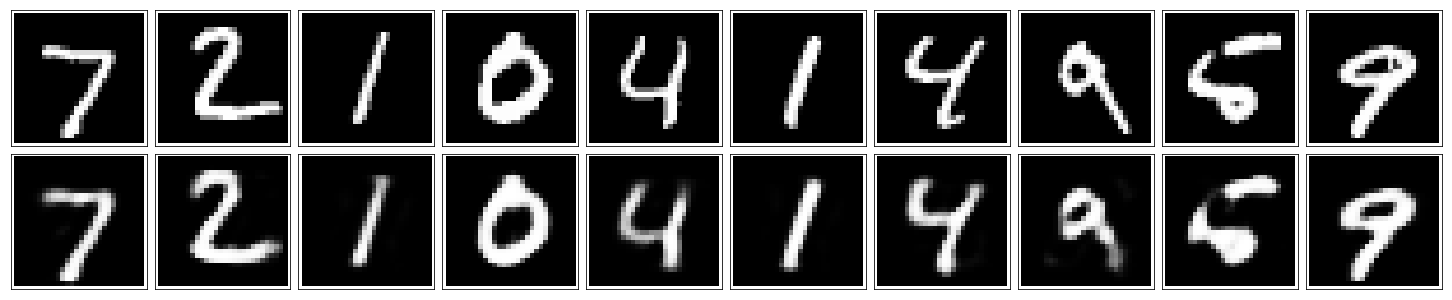

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [8]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.